# 분류를 위한 선형 회구

#### 선형 회귀를 이용한 분류

epoch: 0, current cost: 8.67369270324707
epoch: 100, current cost: 2.836815595626831
epoch: 200, current cost: 1.75147545337677
epoch: 300, current cost: 1.5432567596435547
epoch: 400, current cost: 1.5033104419708252
epoch: 500, current cost: 1.4956469535827637
epoch: 600, current cost: 1.4941767454147339
epoch: 700, current cost: 1.4938944578170776
epoch: 800, current cost: 1.4938403367996216
epoch: 900, current cost: 1.4938302040100098
learned parameters(w): [ 1.296736  -0.2307206]
accuracy:  0.9


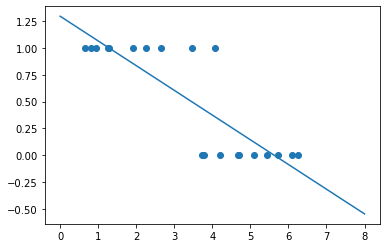

In [10]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# fake data 초기화
x_label0 = np.random.normal(5, 1, 10)
x_label1 = np.random.normal(2, 1, 10)
xs = np.append(x_label0, x_label1)
# 라벨 초기화
labels = [0.] * len(x_label0) + [1.] * len(x_label1)

plt.scatter(xs, labels)

# 하이퍼파라미터 설정
learning_rate = 0.001
training_epochs = 1000

X = tf.placeholder('float')
Y = tf.placeholder('float')

# y = w1*x + w0
# 선형 모델 정의
def model(X, w):
    return tf.add(tf.multiply(w[1], tf.pow(X, 1)), tf.multiply(w[0], tf.pow(X, 0)))

w = tf.Variable([0., 0.], name="parameters")
y_model = model(X, w)
cost = tf.reduce_sum(tf.square(Y - y_model))
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

#

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

for epoch in range(training_epochs):
    sess.run(train_op, feed_dict={X : xs, Y : labels})
    current_cost = sess.run(cost, feed_dict={X : xs, Y : labels})

    if epoch % 100 == 0:
        print(f"epoch: {epoch}, current cost: {current_cost}")

w_val = sess.run(w)
print(f"learned parameters(w): {w_val}")

# 정확도 측정
correct_prediction = tf.equal(Y, tf.to_float(tf.greater(y_model, 0.5)))

accuracy = tf.reduce_mean(tf.to_float(correct_prediction))

print("accuracy: ", sess.run(accuracy, feed_dict={X : xs, Y : labels}))


sess.close()

all_xs = np.linspace(0, 8, 100)
plt.plot(all_xs, all_xs*w_val[1] + w_val[0])
plt.show()